# Taller 4: Detección de contornos

*Santiago Gómez - 202315097*

*Angie Gutiérrez - 202223607*

*Grupo 7*

In [1]:
# Importaciones necesarias
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.filters import sobel, sobel_h, sobel_v, prewitt_h, prewitt_v, prewitt, laplace, gaussian
from skimage import exposure
from skimage.feature import canny

# **Filtros lineales de detección de contornos**

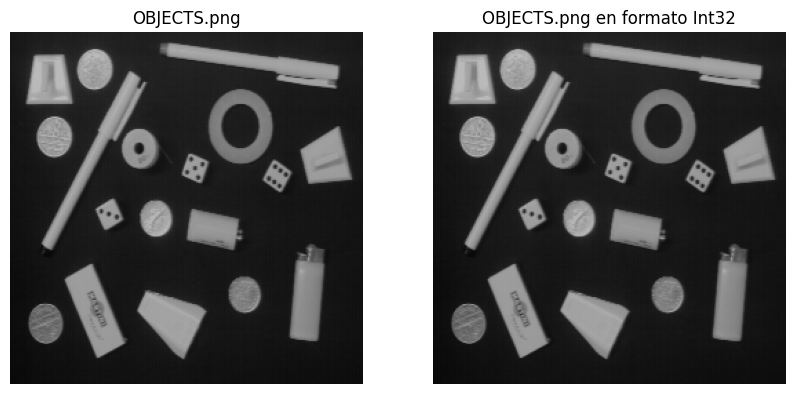

In [2]:
# Carga de OBJECTS.png
objects = cv2.imread('images/OBJECTS.png', cv2.IMREAD_GRAYSCALE)

# Conversión de OBJECTS.png a una imagen de Int32
objects32 = objects.astype(np.uint32)

# Visualización de las dos imagenes que deben ser iguales
fig_objects, ax_objects = plt.subplots(1, 2, figsize=(10, 5))
ax_objects[0].imshow(objects, cmap='gray', vmin=0, vmax=255)
ax_objects[0].set_title('OBJECTS.png')
ax_objects[0].axis('off')
ax_objects[1].imshow(objects32, cmap='gray', vmin=0, vmax=255)
ax_objects[1].set_title('OBJECTS.png en formato Int32')
ax_objects[1].axis('off')
plt.show()

### **Operador de Sobel**

*Sobel vertical*
$$G_y = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}$$

*Sobel horizontal*
$$G_x = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}$$

*Magnitud cálculada con gx, gy*
$$M(x,y) = ||\nabla f|| \approx |G_x| + |G_y|$$



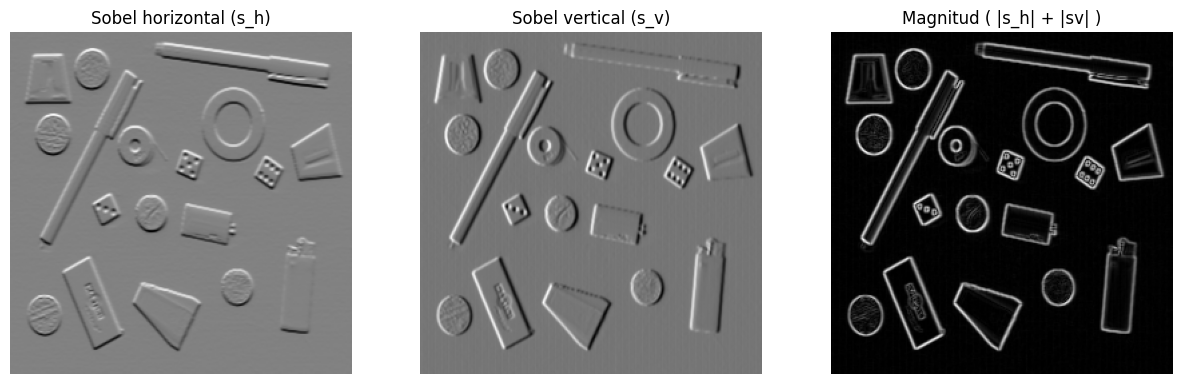

In [3]:
# Sobel sobre eje horizontal
objects_sh = sobel_h(objects32)

# Sobel sobre eje vertical
objects_sv = sobel_v(objects32)

# Cálculo explicito de la magnitud
objects_sm = np.abs(objects_sh) + np.abs(objects_sv)

# Visualización de resultados
fig_sobel, ax_sobel = plt.subplots(1, 3, figsize=(15, 5))
ax_sobel[0].imshow(objects_sh, cmap='gray')
ax_sobel[0].set_title('Sobel horizontal (s_h)')
ax_sobel[0].axis('off')
ax_sobel[1].imshow(objects_sv, cmap='gray')
ax_sobel[1].set_title('Sobel vertical (s_v)')
ax_sobel[1].axis('off')
ax_sobel[2].imshow(objects_sm, cmap='gray')
ax_sobel[2].set_title('Magnitud ( |s_h| + |sv| )')
ax_sobel[2].axis('off')
plt.show()

**Descripción cualitativa de cada imágen:**

* El sobel horizontal exactamente resalta los bordes horizontales, de hecho, se resaltan las partes superiores e inferiores de los objetos (como el cuerpo largo del bolígrafo horizontal o las bases de las figuras).

* El sobel vertical precisamente resalta las líneas verticales (como los costados de las monedas o del encendedor).

* La magnitud tiene como fin combinar ambos recorridos y permite que le resultado final sea solo la línea de contorno pura sobre fondo negro. Al sumar los valores absolutos, el resultado final "ilumina" todos los bordes por igual, sin importar si el cambio de intensidad fue horizontal o vertical.

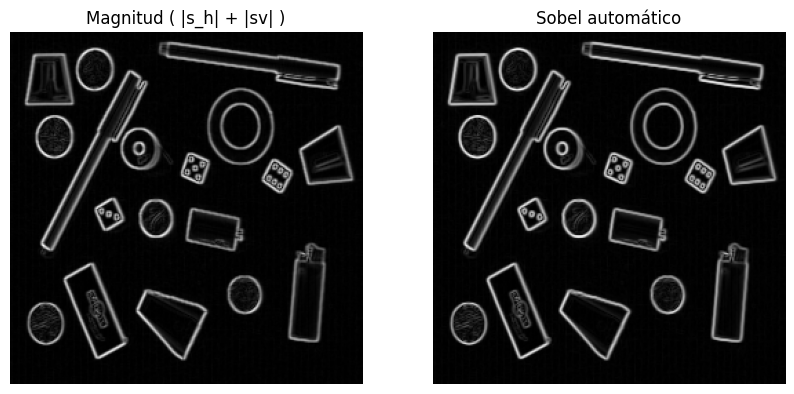

In [4]:
# Bordes de objects con sobel
objects_s = sobel(objects32)

# Visualización para comparar magnitud manual y sobel automático
fig_sobel_2, ax_sobel_2 = plt.subplots(1, 2, figsize=(10, 5))
ax_sobel_2[0].imshow(objects_sm, cmap='gray')
ax_sobel_2[0].set_title('Magnitud ( |s_h| + |sv| )')
ax_sobel_2[0].axis('off')
ax_sobel_2[1].imshow(objects_s, cmap='gray')
ax_sobel_2[1].set_title('Sobel automático')
ax_sobel_2[1].axis('off')
plt.show()

**Comparación entre Magnitud Manual y Sobel Original**

Al visualizar ambas imagenes resultantes, notamos que no hay una verdadera distinción entre ellas. Por lo tanto, la equivalencia visual entre el operador de Sobel manual y el automático valida la correcta implementación de la convolución y el cálculo de la magnitud del gradiente.

Este resultado demuestra que, para imágenes con alto contraste como objects.png, la aproximación manual por suma de valores absolutos es una alternativa computacionalmente eficiente y fiel a los métodos de segmentación estandarizados.

### **Operador de Prewitt**

*Prewitt vertical*
$$G_y = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}$$

*Prewitt horizontal*
$$G_x = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}$$

*Magnitud cálculada con gx, gy*
$$M(x,y) = ||\nabla f|| \approx |G_x| + |G_y|$$


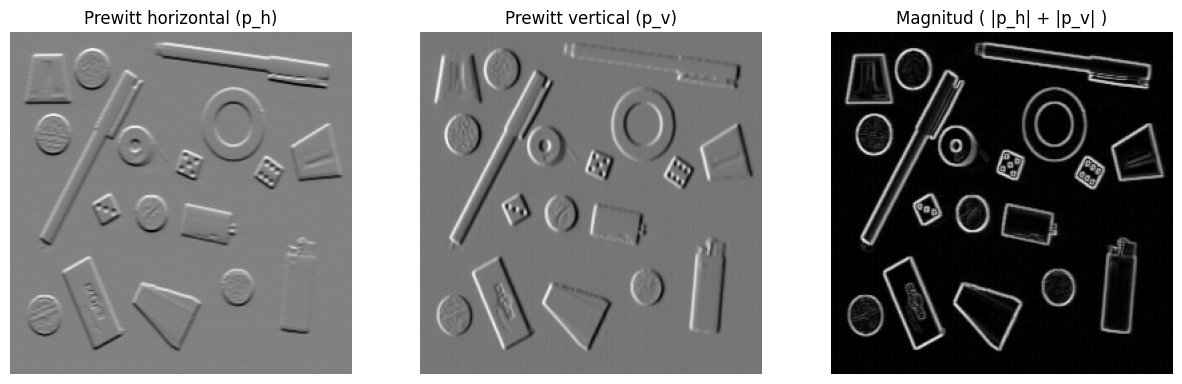

In [5]:
# Prewitt sobre el eje horizontal
objects_ph = prewitt_h(objects32)

# Prewitt sobre el eje vertical
objects_pv = prewitt_v(objects32)

# Magnitud cálculada manualmente
objects_pm = np.abs(objects_ph) + np.abs(objects_pv)

# Visualización de resultados
fig_prewitt, ax_prewitt = plt.subplots(1, 3, figsize=(15, 5))
ax_prewitt[0].imshow(objects_ph, cmap='gray')
ax_prewitt[0].set_title('Prewitt horizontal (p_h)')
ax_prewitt[0].axis('off')
ax_prewitt[1].imshow(objects_pv, cmap='gray')
ax_prewitt[1].set_title('Prewitt vertical (p_v)')
ax_prewitt[1].axis('off')
ax_prewitt[2].imshow(objects_pm, cmap='gray')
ax_prewitt[2].set_title('Magnitud ( |p_h| + |p_v| )')
ax_prewitt[2].axis('off')
plt.show()

**Descripción cualitativa de cada imágen:**

* Prewitt horizontal ($p_h$): Al igual que en el ejercicio anterior, este filtro realiza un barrido de arriba hacia abajo que resalta con gran nitidez los bordes horizontales de los objetos. Se observa claramente la estructura superior e inferior de los bolígrafos y las bases de los dados y el encendedor. Al no tener el peso central de Sobel, el relieve se ve un poco más "plano" pero muy definido en líneas rectas.

* Prewitt vertical ($p_v$): Este filtro realiza un barrido de izquierda a derecha, enfatizando exclusivamente los bordes verticales. Es ideal para visualizar los costados de las monedas, el cuerpo cilíndrico de los marcadores y los laterales del encendedor. Las estructuras que corren paralelas al eje horizontal tienden a desvanecerse en esta vista.

* Magnitud del gradiente ($|p_h| + |p_v|$): Esta imagen integra ambos componentes para generar una representación completa de los contornos sobre un fondo negro absoluto. Al sumar los valores absolutos de ambos gradientes, se logra "iluminar" el perímetro total de cada objeto sin importar su orientación. El resultado es una máscara de bordes muy limpia que conserva la geometría original de todos los elementos en la escena.

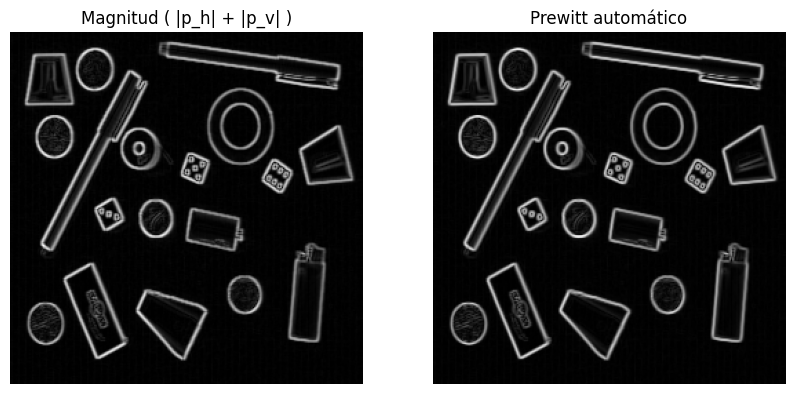

In [6]:
# Prewitt automático sobre objects.png
objects_p = prewitt(objects32)

# Comparación entre magnitud manual y prewitt automático
fig_prewitt_2, ax_prewitt_2 = plt.subplots(1, 2, figsize=(10, 5))
ax_prewitt_2[0].imshow(objects_pm, cmap='gray')
ax_prewitt_2[0].set_title('Magnitud ( |p_h| + |p_v| )')
ax_prewitt_2[0].axis('off')
ax_prewitt_2[1].imshow(objects_p, cmap='gray')
ax_prewitt_2[1].set_title('Prewitt automático')
ax_prewitt_2[1].axis('off')
plt.show()

**Comparación entre Magnitud manual y Prewitt automático**

Vemos que entre ambas imágenes NO existe una diferencia perceptible; de hecho, los contornos de las monedas, dados y demás objetos en objects.png conservan la misma intensidad y continuidad.

Al igual que con el operador anterior, se valida que la aproximación de la magnitud mediante la suma de valores absolutos ($|p\_h| + |p\_v|$) es totalmente funcional para propósitos de detección de bordes en imágenes de alto contraste, ofreciendo un resultado fiel a la norma euclidiana sin un costo computacional elevado.

### **Diferencia entre Sobel y Prewitt**

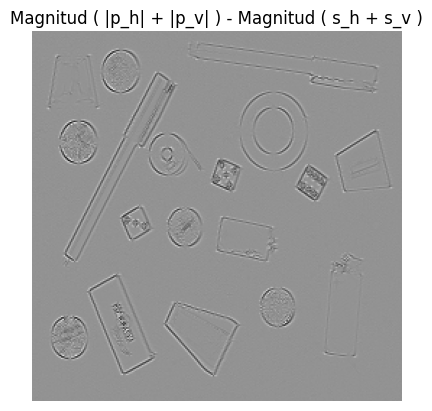

In [29]:
# Sustracción a objects_pm de objects_sm
sustraction_pm_sm = cv2.subtract(objects_pm, objects_sm)

# Visualización de sustracción
plt.imshow(sustraction_pm_sm, cmap='gray')
plt.title('Magnitud ( |p_h| + |p_v| ) - Magnitud ( s_h + s_v )')
plt.axis('off')
plt.show()

**¿Qué diferencia visual hay entre el operador de Sobel y el de Prewitt?**

Al ver el resultado de la sustracción vemos que esta NO es negra porque no son idénticos, si lo fueran sería x-x = 0 (negro). Además, Sobel tiende a producir bordes con una intensidad de brillo ligeramente mayor en ciertas transiciones, mientras que Prewitt genera una respuesta más uniforme.


### **Cálculo númerico para los casos indicados y ver la diferencia entre ambos métodos**

In [8]:
# Frontera horizontal entre negro y blanco
matrix_1  = np.array([[0,0,0],
                      [0,0,0],
                      [255,255,255]])

# Frontera vertical entre negro y blanco
matrix_2 = np.array([[0,0,255],
                     [0,0,255],
                     [0,0,255]])

# Frontera oblicua entre negro y blanco
matrix_3 = np.array([[0,0,255],
                     [0,255,255],
                     [255,255,255]])

#Cuando la máscara se aleja de la frontera oblicua (máscara centrada en [0])
matrix_4 = np.array([[0,0,0],
                     [0,0,0],
                     [0,0,255]])

matrices = [matrix_1, matrix_2, matrix_3, matrix_4]
nombres_casos = ["Horizontal", "Vertical", "Oblicua", "Alejada/Ruido"]

# DEFINICIÓN DE KERNELS (MÁSCARAS)

# Sobel
sobel_y = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_x = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

# Prewitt
prewitt_y = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_x = np.array([[-1, -1, -1],
                      [ 0,  0,  0],
                      [ 1,  1,  1]])

In [9]:
# CÁLCULO
def procesar_kernels(matriz, kx, ky, nombre_filtro):
    # La convolución en el centro es la suma del producto elemento a elemento
    gx = np.sum(matriz * kx)
    gy = np.sum(matriz * ky)

    # Norma L1 (Suma de absolutos)
    magnitud = abs(gx) + abs(gy)
    return gx, gy, magnitud

# Visualización
print(f"{'CASO':<15} | {'FILTRO':<8} | {'Gx':<6} | {'Gy':<6} | {'MAGNITUD':<8}")
print("-" * 60)
for i, mat in enumerate(matrices):
    # Calcular Sobel
    sgx, sgy, smag = procesar_kernels(mat, sobel_x, sobel_y, "Sobel")
    # Calcular Prewitt
    pgx, pgy, pmag = procesar_kernels(mat, prewitt_x, prewitt_y, "Prewitt")

    print(f"{nombres_casos[i]:<15} | Sobel    | {sgx:<6} | {sgy:<6} | {smag:<8}")
    print(f"{'':<15} | Prewitt  | {pgx:<6} | {pgy:<6} | {pmag:<8}")
    print("-" * 60)

CASO            | FILTRO   | Gx     | Gy     | MAGNITUD
------------------------------------------------------------
Horizontal      | Sobel    | 1020   | 0      | 1020    
                | Prewitt  | 765    | 0      | 765     
------------------------------------------------------------
Vertical        | Sobel    | 0      | 1020   | 1020    
                | Prewitt  | 0      | 765    | 765     
------------------------------------------------------------
Oblicua         | Sobel    | 765    | 765    | 1530    
                | Prewitt  | 510    | 510    | 1020    
------------------------------------------------------------
Alejada/Ruido   | Sobel    | 255    | 255    | 510     
                | Prewitt  | 255    | 255    | 510     
------------------------------------------------------------


**Conclusión del Análisis Numérico: Sobel vs. Prewitt**
1. En los bordes rectos (Horizontales y Verticales), el operador de Sobel genera una respuesta de magnitud mayor (1020) en comparación con Prewitt (765). Esto se puede explicar al ver las máscaras de Sobel que tienen un coeficiente central de 2, lo cual otorga mayor peso a los píxeles adyacentes al centro.

2. En la frontera oblicua, el operador Sobel sobresale (1530) ante Prewitt (1020). Lo cual demuestra que Sobel  es mucho más sensible a bordes que no están perfectamente alineados con los ejes X o Y, resaltando mejor las curvas y diagonales de los objetos.

3. En el caso de "Alejada/Ruido" (un píxel aislado o una esquina aguda), ambos filtros producen exactamente la misma magnitud (510). Es decir, Prewitt trata al ruido y a los bordes con la misma linealidad, resultando en contornos menos robustos.

# **Operador de Canny**

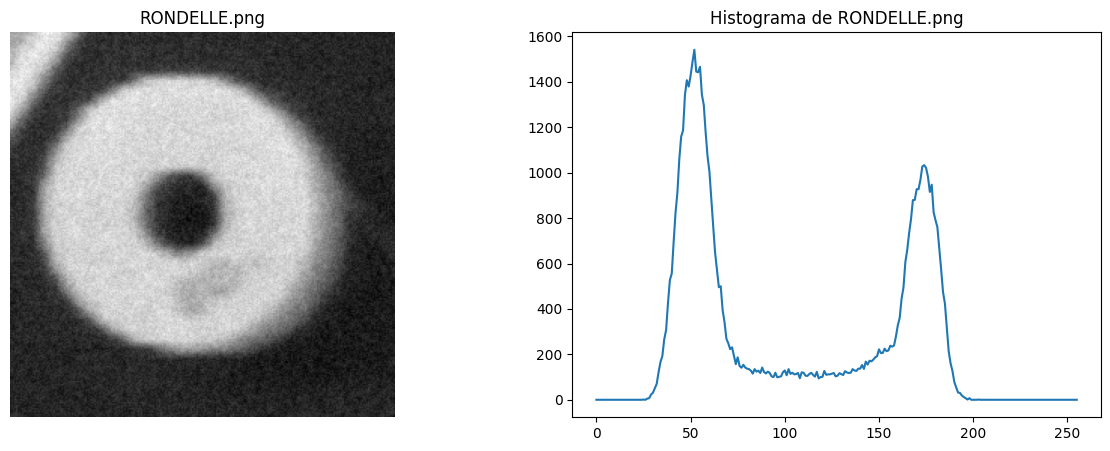

In [10]:
# Carga de la imagen RONDELLE.png
rondelle = cv2.imread('images/RONDELLE.png', cv2.IMREAD_GRAYSCALE)

# Histograma de RONDELLE.png
hist_ronelle = cv2.calcHist([rondelle], [0], None, [256], [0, 256])

# Visualización de RONDELLE.png y su histograma
fig_rondelle, ax_rondelle = plt.subplots(1, 2, figsize=(15, 5))
ax_rondelle[0].imshow(rondelle, cmap='gray')
ax_rondelle[0].set_title('RONDELLE.png')
ax_rondelle[0].axis('off')
ax_rondelle[1].plot(hist_ronelle)
ax_rondelle[1].set_title('Histograma de RONDELLE.png')
plt.show()

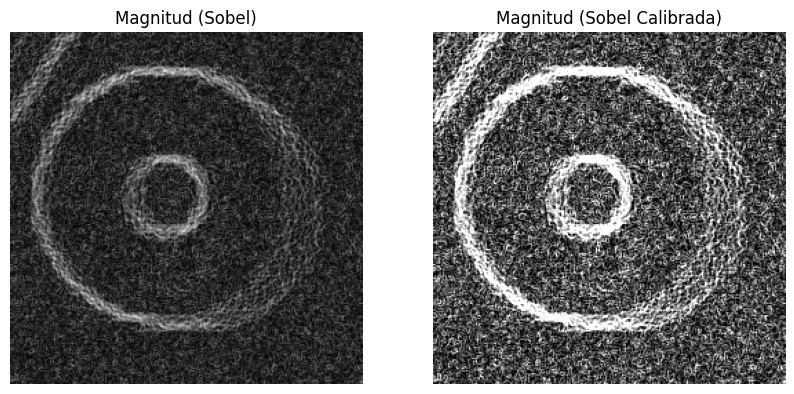

In [12]:
# Operador sobel mediante magnitud
rondelle_sv = sobel_v(rondelle)
rondelle_sh = sobel_h(rondelle)
rondelle_m = np.abs(rondelle_sv) + np.abs(rondelle_sh)

# Calibración de rondelle con sobel
p5, p95 = np.percentile(rondelle_m, (5, 95)) # Buscamos los límites del histograma de bordes
sobel_calibrada = exposure.rescale_intensity(rondelle_m, in_range=(p5, p95))

# Visualización de sobel sobre rondelle original y calibración de esta
fig_rondelle_sobel, ax_rondelle_sobel = plt.subplots(1, 2, figsize=(10, 5))
ax_rondelle_sobel[0].imshow(rondelle_m, cmap='gray')
ax_rondelle_sobel[0].set_title('Magnitud (Sobel)')
ax_rondelle_sobel[0].axis('off')
ax_rondelle_sobel[1].imshow(sobel_calibrada, cmap='gray')
ax_rondelle_sobel[1].set_title('Magnitud (Sobel Calibrada)')
ax_rondelle_sobel[1].axis('off')
plt.show()

Al aplicar el operador de Sobel sobre la arandela y realizar la expansión de contraste, se observan los siguientes fenómenos:

* Magnitud (Sobel): La imagen resultante es predominantemente oscura y con bajo contraste porque los valores de gradiente son pequeños, dificultando la distinción clara entre la estructura del rondelle y el ruido de fondo. No es un resultado malo dado que los bordes circulares de la arandela son perceptibles, pero se puede mejorar.

* Magnitud (Sobel Calibrada): Tras aplicar la calibración (ajuste de in_range), el cambio es drástico porque los contornos de la arandela se vuelven blancos brillantes y mucho más definidos, facilitando la identificación de la geometría circular interna y externa. Además, se resalta el ruido de alta frecuencia presenta en la superficie metálica y el fondo.

### **Operador Canny**

*Parámetros*
* Desviación estándar= 10
* Umbral inferior (low_threshold) = 0
* Umbral superior (high_threshold) = 1 (eliminar la mayoría de falsas detecciones de pequeña amplitud del gradiente)

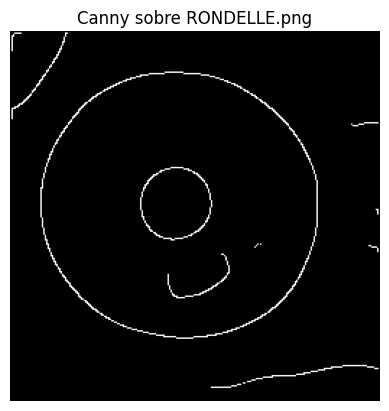

In [13]:
# Aplicación del operador de Canny sobre RONDELLE.png
sigma10 = 10
low_threshold = 0
high_threshold = 1
rondelle_canny10 = canny(rondelle, sigma10, low_threshold, high_threshold)

# Visualización Canny sobre Rondelle
plt.imshow(rondelle_canny10, cmap='gray')
plt.title('Canny sobre RONDELLE.png')
plt.axis('off')
plt.show()

**Descripción de visualización de Canny (sigma=10, lw= 0, hg= 1)**

El operador de Canny demuestra una superioridad técnica clara sobre Sobel para la segmentación de formas geométricas en *entornos ruidosos*. Mediante el uso de una desviación estándar elevada ($\sigma = 10$), se logró priorizar la estructura global de la arandela sobre el ruido de la superficie, obteniendo bordes delgados, precisos y listos para procesos de medición morfológica o reconocimiento de formas, algo imposible de lograr únicamente con una umbralización global del gradiente


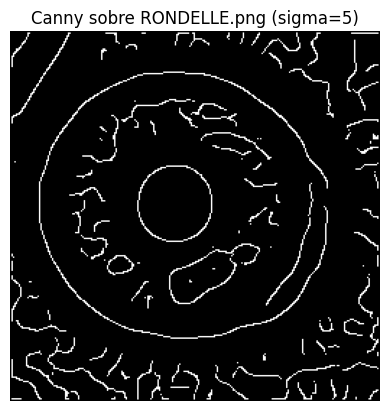

In [14]:
# Cambio de sigma a 5 para canny
sigma5 = 5
rondelle_canny5 = canny(rondelle, sigma5, low_threshold, high_threshold)

# Visualización de Canny sigma 5 sobre rondelle
plt.imshow(rondelle_canny5, cmap='gray')
plt.title('Canny sobre RONDELLE.png (sigma=5)')
plt.axis('off')
plt.show()

**Descripción de visualización de Canny (sigma= 5, lw= 0, hg= 1)**

Realmente aumenta la presencia de ruido y aumenta el detalle.
Al disminuir la desviación estándar de 10 a 5, se reduce el ancho del kernel del filtro gaussiano, lo que aumenta el ancho de banda del sistema y permite el paso de componentes de alta frecuencia.  Mientras que un $\sigma$ alto permitía extraer la geometría global (la forma circular), un $\sigma$ menor expone la textura local del espécimen, lo que en este caso satura la imagen de *falsos positivos* que dificultan la segmentación clara del objeto principal.

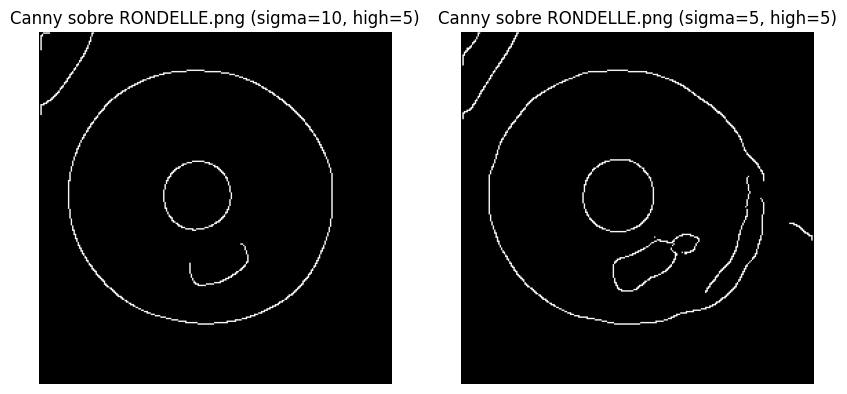

In [15]:
# Cambio de high a 5 con sigma 10 y 5
high_threshold5 = 5
rondelle_canny10_5 = canny(rondelle, sigma10, low_threshold, high_threshold5)
rondelle_canny5_5 = canny(rondelle, sigma5, low_threshold, high_threshold5)

# Comparación al aumentar el high a 5
fig_canny, ax_canny = plt.subplots(1, 2, figsize=(10, 5))
ax_canny[0].imshow(rondelle_canny10_5, cmap='gray')
ax_canny[0].set_title('Canny sobre RONDELLE.png (sigma=10, high=5)')
ax_canny[0].axis('off')
ax_canny[1].imshow(rondelle_canny5_5, cmap='gray')
ax_canny[1].set_title('Canny sobre RONDELLE.png (sigma=5, high=5)')
ax_canny[1].axis('off')
plt.show()

**Comparación de la variación de parámetros en el operador Canny**

Al elevar el umbral superior, se vuelven más exigentes las condiciones para que un píxel sea considerado el "inicio" de un borde real.

1. Caso $\sigma = 10$ con high_threshold = 5

Logramos evidenciar que la imagen se vuelve aún más minimalista y limpia que en el punto 3 porque se mantienen los perímetros circulares principales, pero desaparecen pequeñas trazas o artefactos de sombra que antes eran visibles con el umbral en 1.

Es decir que combinar un filtrado fuerte con un umbral alto, solo permite que sobrevivan los bordes con la magnitud de gradiente más intensa.

2. Caso $\sigma = 5$ con high_threshold = 5

Se observa una "limpieza" masiva del ruido que apareció en el punto 4 porque la mayoría de los bordes ruidosos de la superficie metálica no alcanzan esta magnitud y son descartados. De hecho, los bordes de la arandela ahora se ven más definidos que con $\sigma=10$, capturando mejor las irregularidades reales de la pieza sin saturarse de ruido.

Es decir que al aumentar el umbral se produce un descarte importante en el paso de texturas que permite el filtrado gaussiano débil.

**Conclusiones de la Comparación**

Realmente el equilibrio óptimo para esta imagen se encuentra en una configuración de $\sigma=5$ y high_threshold=5, ya que permite una detección de bordes más fiel a la morfología real de la arandela (incluyendo pequeños detalles de su relieve) sin la pérdida de información que provoca un filtrado excesivo de $\sigma=10$, pero manteniendo la limpieza de fondo necesaria para un análisis de visión computacional posterior.

# **Laplaciano**

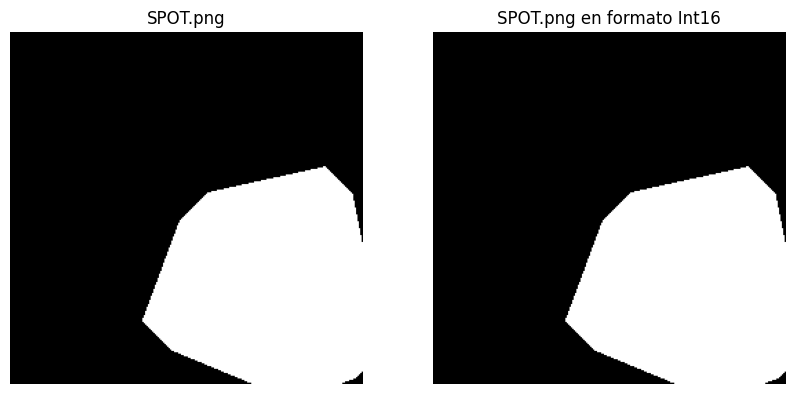

In [16]:
# Carga de SPOT.png
spot = cv2.imread('images/SPOT.png', cv2.IMREAD_GRAYSCALE)

# Conversión para que SPOT.png pueda contener niveles de gris negativos
spot = spot.astype(np.uint16)

# Visualización de la imagen y su conversión
fig_spot, ax_spot = plt.subplots(1, 2, figsize=(10, 5))
ax_spot[0].imshow(spot, cmap='gray')
ax_spot[0].set_title('SPOT.png')
ax_spot[0].axis('off')
ax_spot[1].imshow(spot, cmap='gray', vmin=0, vmax=255)
ax_spot[1].set_title('SPOT.png en formato Int16')
ax_spot[1].axis('off')
plt.show()

### **Aplicación del Laplaciano**

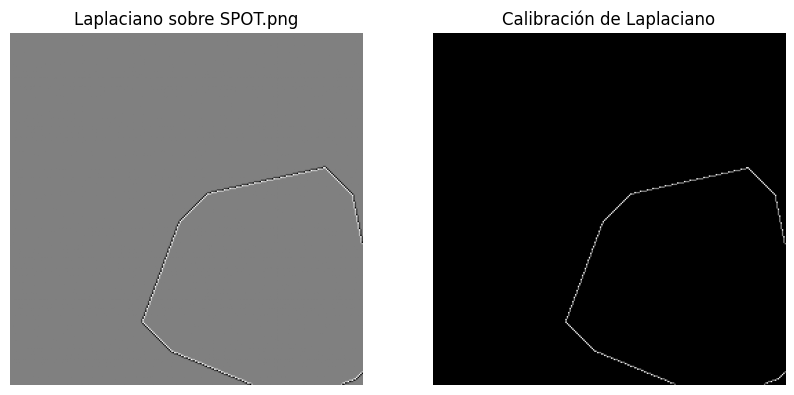

In [18]:
# Laplaciano sobre spot tipo 16
spot_lap = laplace(spot, ksize=3) #ksize corresponde al tamaño del operador laplaciano discreto.

# Calibración para mejorar resultados
spot_lap_rescaled = exposure.rescale_intensity(spot_lap, in_range=(0, 255), out_range=(0, 255))

# Visualización de spot lap y su calibración
fig_spot_lap, ax_spot_lap = plt.subplots(1, 2, figsize=(10, 5))
ax_spot_lap[0].imshow(spot_lap, cmap='gray')
ax_spot_lap[0].set_title('Laplaciano sobre SPOT.png')
ax_spot_lap[0].axis('off')
ax_spot_lap[1].imshow(spot_lap_rescaled, cmap='gray')
ax_spot_lap[1].set_title('Calibración de Laplaciano')
ax_spot_lap[1].axis('off')
plt.show()

**¿Cómo es la respuesta del Laplaciano en las regiones homogéneas de la imagen y en los contornos?**

1. *Primer caso:* En las áreas de la imagen donde la intensidad es constante o varía muy poco (tanto en el fondo negro como en el interior blanco del objeto), la respuesta del Laplaciano es cero o muy cercana a cero. En la imagen sin calibrar, estas regiones se observan de un color gris medio (que representa el valor neutro 0 después del desplazamiento de niveles para visualización).

2. *Segundo caso:* En la imagen sin calibrar se observa una línea blanca y una línea negra muy delgadas y adyacentes que delimitan la forma del "spot". Tras la calibración, esto se traduce en un contorno blanco muy fino y preciso sobre un fondo negro absoluto.

**¿A qué se debe este resultado?**

1. *Primer caso:* Al ser una derivada de segundo orden, si no hay cambio en la pendiente de la intensidad (la primera derivada es constante), la segunda derivada es nula por definición.

2. *Segundo caso:* El Laplaciano detecta el paso por cero (zero-crossing). En un borde, la concavidad de la función de intensidad cambia, lo que genera un valor máximo positivo justo antes del borde y un valor mínimo negativo justo después.

### **Operador LoG (Laplacian of Gaussian)**

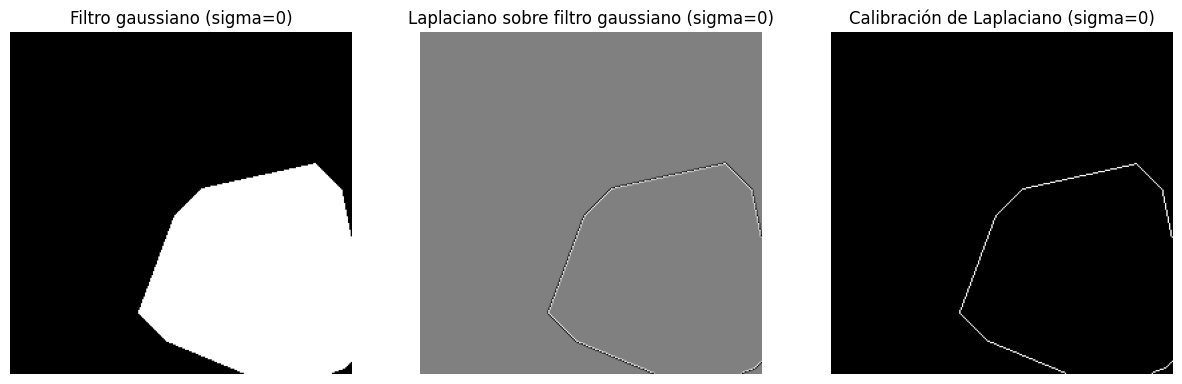

In [19]:
# Aplicación del filtro gaussiano sigma=0
spot_gaussian0 = gaussian(spot, sigma=0, preserve_range=True) # preserve_range indica si se mantiene el intervalo original de valores

# Laplaciano sobre spot (sigma=0)
spot_lap_gaussian0 = laplace(spot_gaussian0, ksize=3)

# Calibración sobre laplaciano (sigma=0)
spot_lap_gaussian0_rescaled = exposure.rescale_intensity(spot_lap_gaussian0, in_range=(0, 255), out_range=(0, 255))

# Visualización de filtro gaussiano y su laplaciano (sigma=0)
fig_spot_lap_gaussian0, ax_spot_lap_gaussian0 = plt.subplots(1, 3, figsize=(15,5))
ax_spot_lap_gaussian0[0].imshow(spot_gaussian0, cmap='gray')
ax_spot_lap_gaussian0[0].set_title('Filtro gaussiano (sigma=0)')
ax_spot_lap_gaussian0[0].axis('off')
ax_spot_lap_gaussian0[1].imshow(spot_lap_gaussian0, cmap='gray')
ax_spot_lap_gaussian0[1].set_title('Laplaciano sobre filtro gaussiano (sigma=0)')
ax_spot_lap_gaussian0[1].axis('off')
ax_spot_lap_gaussian0[2].imshow(spot_lap_gaussian0_rescaled, cmap='gray')
ax_spot_lap_gaussian0[2].set_title('Calibración de Laplaciano (sigma=0)')
ax_spot_lap_gaussian0[2].axis('off')
plt.show()

**¿Cómo es la respuesta de este LoG con respecto al Laplaciano sin filtrado previo del ejercicio anterior?**

Observamos que tanto la imagen sin calibración (el fondo gris con bordes negros/blancos) como la versión calibrada (el contorno blanco sobre fondo negro) no presentan ninguna diferencia visual. El grosor y la posición del contorno son los mismos.

**¿A qué se debe este resultado?**

Esto ocurre porque se aplicó un filtro Gaussiano de varianza nula  (sigma=0) que dejó los píxeles intactos al no ejercer ningún nivel de suavizado espacial. En consecuencia, la segunda derivada se calcula sobre los mismos gradientes de intensidad originales, impidiendo evaluar la capacidad del LoG para reducir la sensibilidad al ruido.

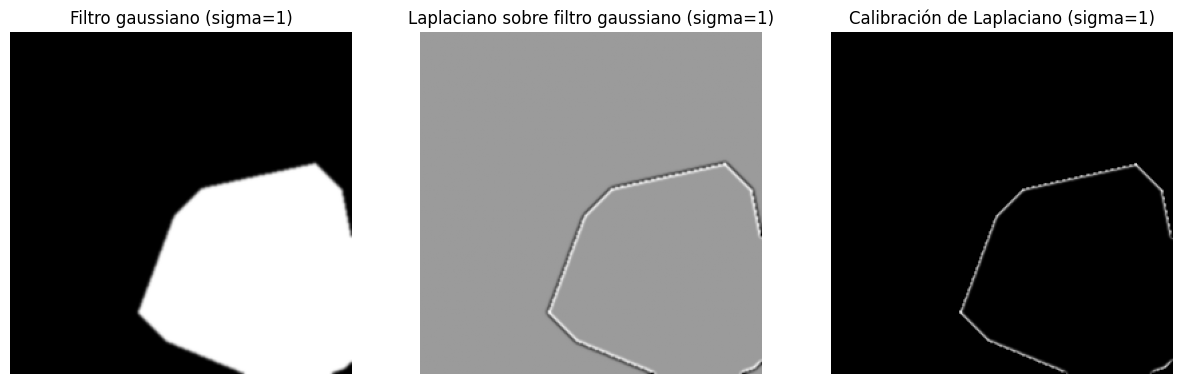

In [20]:
# Aplicación del filtro gaussiano sigma=1
spot_gaussian1 = gaussian(spot, sigma=1, preserve_range=True)

# Laplaciano sobre spot (sigma=1)
spot_lap_gaussian1 = laplace(spot_gaussian1, ksize=3)

# Calibración sobre laplaciano (sigma=0)
spot_lap_gaussian1_rescaled = exposure.rescale_intensity(spot_lap_gaussian1, in_range=(0, 255), out_range=(0, 255))

# Visualización de filtro gaussiano y su laplaciano (sigma=1)
fig_spot_lap_gaussian1, ax_spot_lap_gaussian1 = plt.subplots(1, 3, figsize=(15,5))
ax_spot_lap_gaussian1[0].imshow(spot_gaussian1, cmap='gray')
ax_spot_lap_gaussian1[0].set_title('Filtro gaussiano (sigma=1)')
ax_spot_lap_gaussian1[0].axis('off')
ax_spot_lap_gaussian1[1].imshow(spot_lap_gaussian1, cmap='gray')
ax_spot_lap_gaussian1[1].set_title('Laplaciano sobre filtro gaussiano (sigma=1)')
ax_spot_lap_gaussian1[1].axis('off')
ax_spot_lap_gaussian1[2].imshow(spot_lap_gaussian1_rescaled, cmap='gray')
ax_spot_lap_gaussian1[2].set_title('Calibración de Laplaciano (sigma=1)')
ax_spot_lap_gaussian1[2].axis('off')
plt.show()

**¿Cómo es la respuesta de este LoG con respecto al Laplaciano sin filtrado previo del ejercicio anterior?**

La línea de contorno detectada es notablemente más gruesa y ligeramente difuminada. En la imagen sin calibrar se nota mayor separación en la línea negra/blanca y al aplicar la calibración vemos la línea blanca más "borrosa".

**¿A qué se debe este resultado?**

El filtrado Gaussiano con varianza no nula (sigma=1) suaviza la transición de intensidad en la frontera del objeto, distribuyendo el gradiente sobre un área espacial mayor. Consecuentemente, al calcular la segunda derivada sobre este borde difuminado, la distancia entre los picos máximo y mínimo aumenta, generando un paso por cero más ancho que se traduce visualmente en una línea de contorno más gruesa.

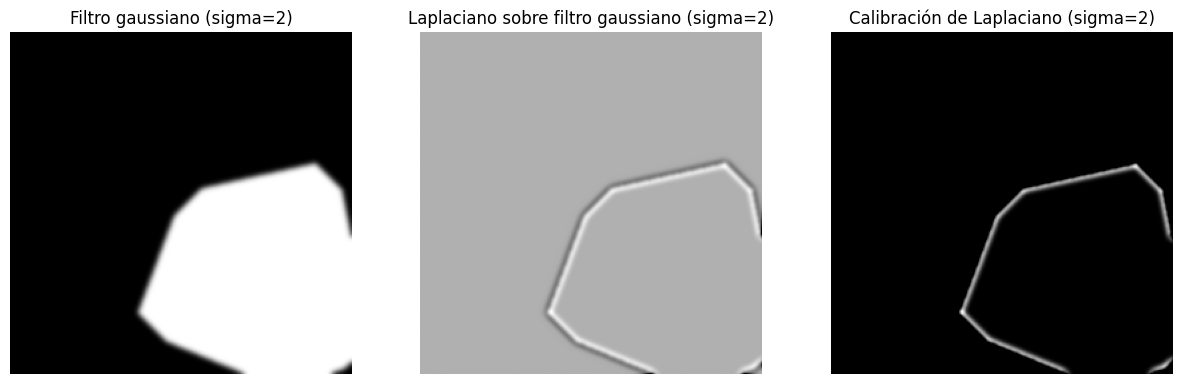

In [21]:
# Aplicación del filtro gaussiano sigma=2
spot_gaussian2 = gaussian(spot, sigma=2, preserve_range=True)

# Laplaciano sobre spot (sigma=2)
spot_lap_gaussian2 = laplace(spot_gaussian2, ksize=3)

# Calibración sobre laplaciano (sigma=0)
spot_lap_gaussian2_rescaled = exposure.rescale_intensity(spot_lap_gaussian2, in_range=(0, 255), out_range=(0, 255))

# Visualización de filtro gaussiano y su laplaciano (sigma=2)
fig_spot_lap_gaussian2, ax_spot_lap_gaussian2 = plt.subplots(1, 3, figsize=(15,5))
ax_spot_lap_gaussian2[0].imshow(spot_gaussian2, cmap='gray')
ax_spot_lap_gaussian2[0].set_title('Filtro gaussiano (sigma=2)')
ax_spot_lap_gaussian2[0].axis('off')
ax_spot_lap_gaussian2[1].imshow(spot_lap_gaussian2, cmap='gray')
ax_spot_lap_gaussian2[1].set_title('Laplaciano sobre filtro gaussiano (sigma=2)')
ax_spot_lap_gaussian2[1].axis('off')
ax_spot_lap_gaussian2[2].imshow(spot_lap_gaussian2_rescaled, cmap='gray')
ax_spot_lap_gaussian2[2].set_title('Calibración de Laplaciano (sigma=2)')
ax_spot_lap_gaussian2[2].axis('off')
plt.show()

**¿Cómo es la respuesta de este LoG con respecto al Laplaciano sin filtrado previo del ejercicio anterior?**

Evidentemente notamos contornos extremadamente gruesos y difuminados, de hecho, en la imagen sin calibrar observamos que la distancia entre la franja negra y la franja blanca se ha expandido notablemente. En adición, nos pareció curioso ver que las esquinas afiladas del polígono original han comenzado a curvarse y redondearse, perdiendo la definición angular que tenían en las pruebas anteriores.

**¿A qué se debe este resultado?**

Al incrementar la varianza del filtro Gaussiano (sigma=2), también es mayor  el nivel de suavizado que expande la rampa de intensidad en las fronteras, provocando que los picos máximo y mínimo de la segunda derivada se distancien y generen una zona de 'paso por cero' más amplia. Adicionalmente, el filtrado agresivo elimina las altas frecuencias espaciales, lo que ocasiona una visible pérdida de agudeza en los vértices del polígono, redondeando sus esquinas.

### **Comparación entre Sobel y LoG**

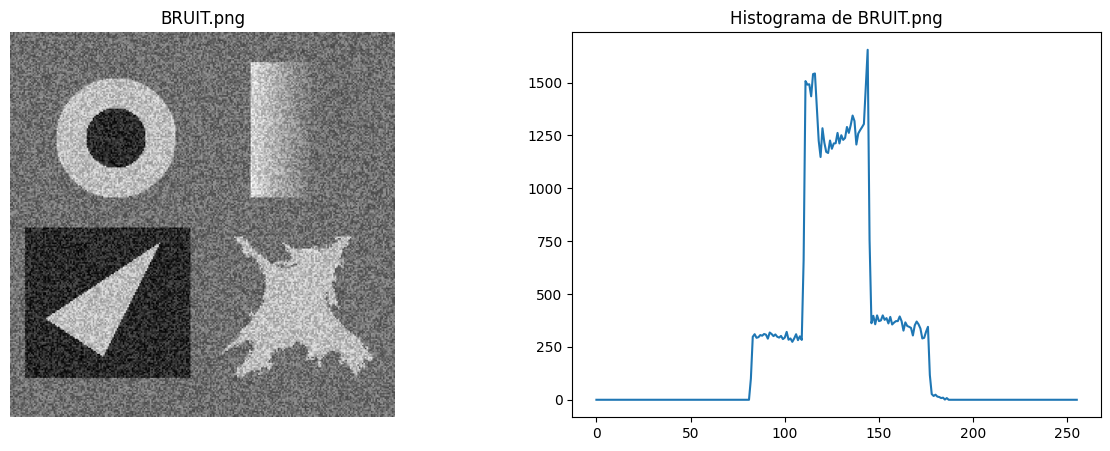

In [22]:
# Carga de BRUIT.png
bruit = cv2.imread('images/BRUIT.png', cv2.IMREAD_GRAYSCALE)

# Histograma de bruit para proximos fines
hist_bruit = cv2.calcHist([bruit], [0], None, [256], [0, 256])

# Conversión para que BRUIT.png pueda contener niveles de gris negativos
bruit = bruit.astype(np.uint16)

# Visualización de Bruit y su histograma
fig_bruit, ax_bruit = plt.subplots(1, 2, figsize=(15, 5))
ax_bruit[0].imshow(bruit, cmap='gray')
ax_bruit[0].set_title('BRUIT.png')
ax_bruit[0].axis('off')
ax_bruit[1].plot(hist_bruit)
ax_bruit[1].set_title('Histograma de BRUIT.png')
plt.show()

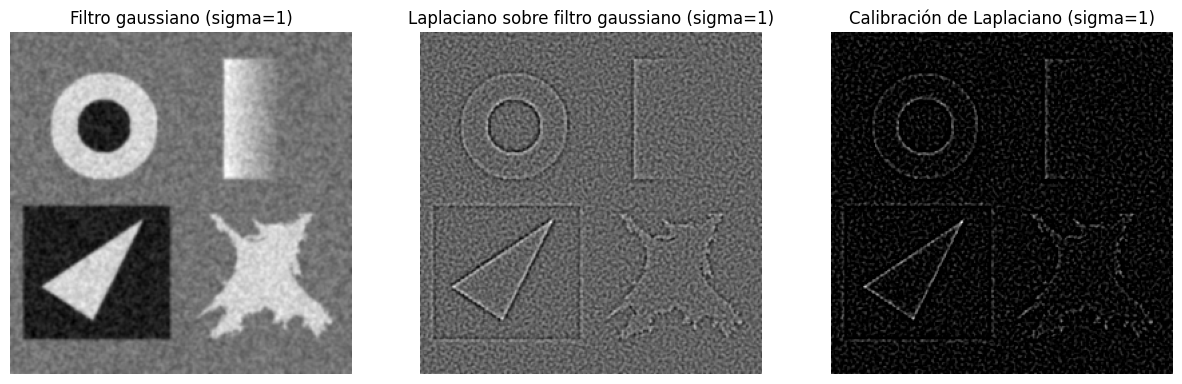

In [23]:
# Filtro gaussiano sobre BRUIT.png con sigma = 1
bruit_gaussian = gaussian(bruit, sigma=1, preserve_range=True)

# Laplaciano sobre bruit_gaussian
bruit_gaussian_laplace = laplace(bruit_gaussian, ksize=3)

# Calibración de bruit_gaussian_laplace
bruit_gaussian_laplace_rescaled = exposure.rescale_intensity(bruit_gaussian_laplace, in_range=(0, 255), out_range=(0, 255))

# Visualización del procedimiendo sobre bruit
fig_bruit1, ax_bruit1 = plt.subplots(1, 3, figsize=(15, 5))
ax_bruit1[0].imshow(bruit_gaussian, cmap='gray')
ax_bruit1[0].set_title('Filtro gaussiano (sigma=1)')
ax_bruit1[0].axis('off')
ax_bruit1[1].imshow(bruit_gaussian_laplace, cmap='gray')
ax_bruit1[1].set_title('Laplaciano sobre filtro gaussiano (sigma=1)')
ax_bruit1[1].axis('off')
ax_bruit1[2].imshow(bruit_gaussian_laplace_rescaled, cmap='gray')
ax_bruit1[2].set_title('Calibración de Laplaciano (sigma=1)')
ax_bruit1[2].axis('off')
plt.show()

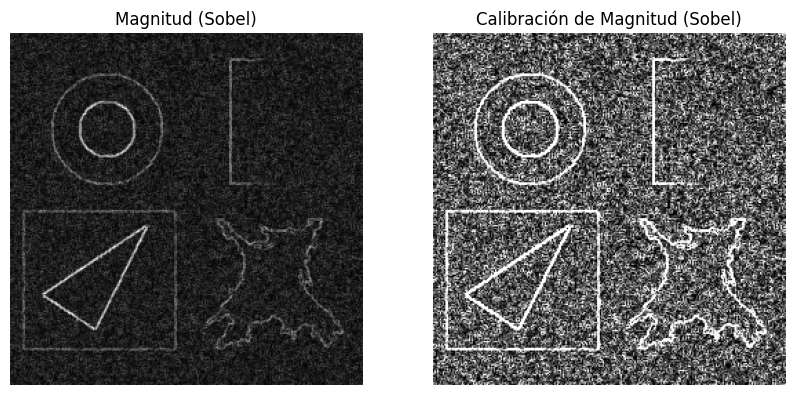

In [24]:
# Sobel sobre BRUIT.png
bruit_sobel_x = sobel_h(bruit)
bruit_sobel_y = sobel_v(bruit)
bruit_sobel_m = np.abs(bruit_sobel_x) + np.abs(bruit_sobel_y)

# Calibración del histograma
p5, p95 = np.percentile(bruit_sobel_m, (5, 95))
bruit_sobel_rescaled = exposure.rescale_intensity(bruit_sobel_m, in_range=(p5, p95), out_range=(0, 255))

# Visualización de magnitud sobel y su calibración
fig_bruit2, ax_bruit2 = plt.subplots(1, 2, figsize=(10,5))
ax_bruit2[0].imshow(bruit_sobel_m, cmap='gray')
ax_bruit2[0].set_title('Magnitud (Sobel)')
ax_bruit2[0].axis('off')
ax_bruit2[1].imshow(bruit_sobel_rescaled, cmap='gray')
ax_bruit2[1].set_title('Calibración de Magnitud (Sobel)')
ax_bruit2[1].axis('off')
plt.show()

**¿En cuál de las dos imágenes es más fácil detectar los contornos?**

De acuerdo a nuestra observación, es más fácil detectar la estructura de los contornos en la imagen calibrada de Sobel.

**¿Por qué?**

* En LoG: Los contornos de las figuras han quedado reducidos a líneas punteadas muy tenues y fragmentadas. La forma de los objetos se pierde y no hay un límite continuo claro.

* En Sobel: Aunque el fondo está completamente saturado de ruido blanco, los contornos del círculo, el triángulo y la figura irregular son líneas gruesas, brillantes y, lo más importante, continuas. Es muy fácil para el ojo humano seguir la forma del objeto.

**¿Cómo afecta el ruido la detección de los contornos en cada caso?**

La teoría dice que el LoG es mejor para el ruido gracias a su filtro Gaussiano previo. Sin embargo, en esta comparación el filtro Gaussiano de $\sigma=1$ resultó insuficiente para suprimir el nivel de ruido presente. Debido a la hipersensibilidad de la segunda derivada, el Laplaciano fragmentó los bordes reales, dejándolos como líneas punteadas débiles y difíciles de segmentar. Esto demuestra que si el suavizado previo del LoG no está calibrado a la medida exacta del ruido ($\sigma$ más alto), los detectores de primer orden como Sobel pueden ser más robustos para conservar la conectividad de las formas geométricas.

### **Realce Laplaciano**

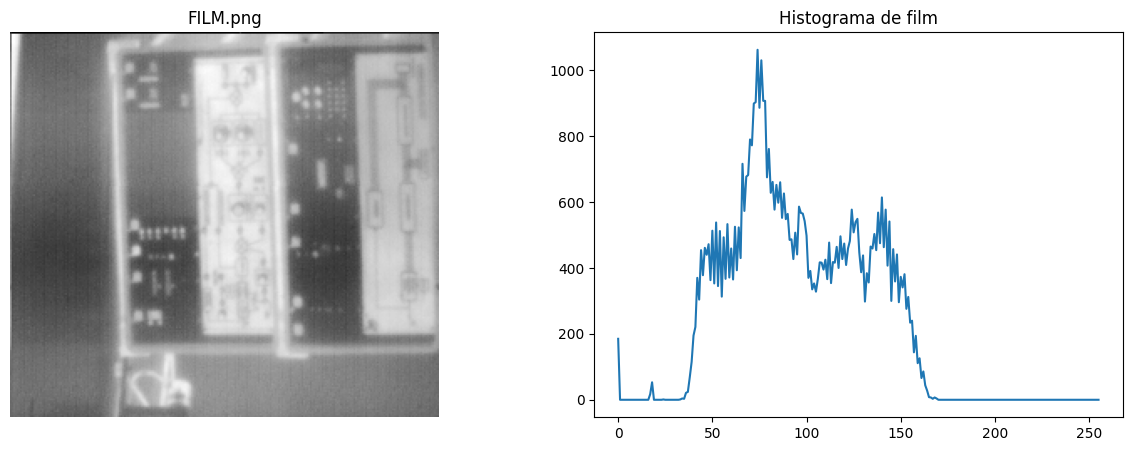

In [25]:
# Carga de FILM.png
film = cv2.imread('images/FILM.png', cv2.IMREAD_GRAYSCALE)

# Histograma de FILM.png
hist_film = cv2.calcHist([film], [0], None, [256], [0, 256])

# Conversión a 16 bits para su visualización
film = film.astype(np.uint16)

# Visualización de film y su respectivo histograma
fig_film, ax_film = plt.subplots(1, 2, figsize=(15, 5))
ax_film[0].imshow(film, cmap='gray')
ax_film[0].set_title('FILM.png')
ax_film[0].axis('off')
ax_film[1].plot(hist_film)
ax_film[1].set_title('Histograma de film')
plt.show()

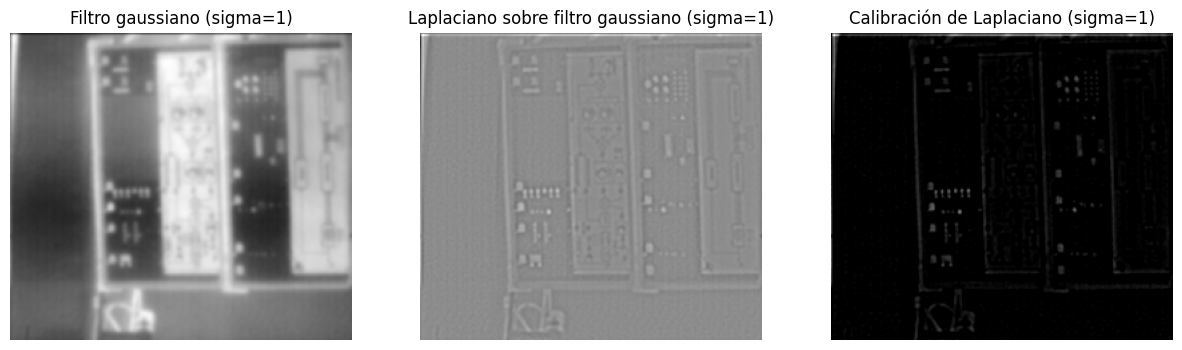

In [26]:
# Filtro gaussiano film con sigma=1
film_gaussian = gaussian(film, sigma=1, preserve_range=True)

# Laplaciano sobre film_gaussian
film_gaussian_laplace = laplace(film_gaussian, ksize=3)

# Calibración de film_gaussian_laplace
film_gaussian_laplace_rescaled = exposure.rescale_intensity(film_gaussian_laplace, in_range=(0, 255), out_range=(0, 255))
film_gaussian_laplace_rescaled = film_gaussian_laplace_rescaled.astype(np.uint8) # conversión a 8 bits

# Visualización sobre el procedimiento LoG sobre film
fig_film1, ax_film1 = plt.subplots(1, 3, figsize=(15, 5))
ax_film1[0].imshow(film_gaussian, cmap='gray')
ax_film1[0].set_title('Filtro gaussiano (sigma=1)')
ax_film1[0].axis('off')
ax_film1[1].imshow(film_gaussian_laplace, cmap='gray')
ax_film1[1].set_title('Laplaciano sobre filtro gaussiano (sigma=1)')
ax_film1[1].axis('off')
ax_film1[2].imshow(film_gaussian_laplace_rescaled, cmap='gray')
ax_film1[2].set_title('Calibración de Laplaciano (sigma=1)')
ax_film1[2].axis('off')
plt.show()

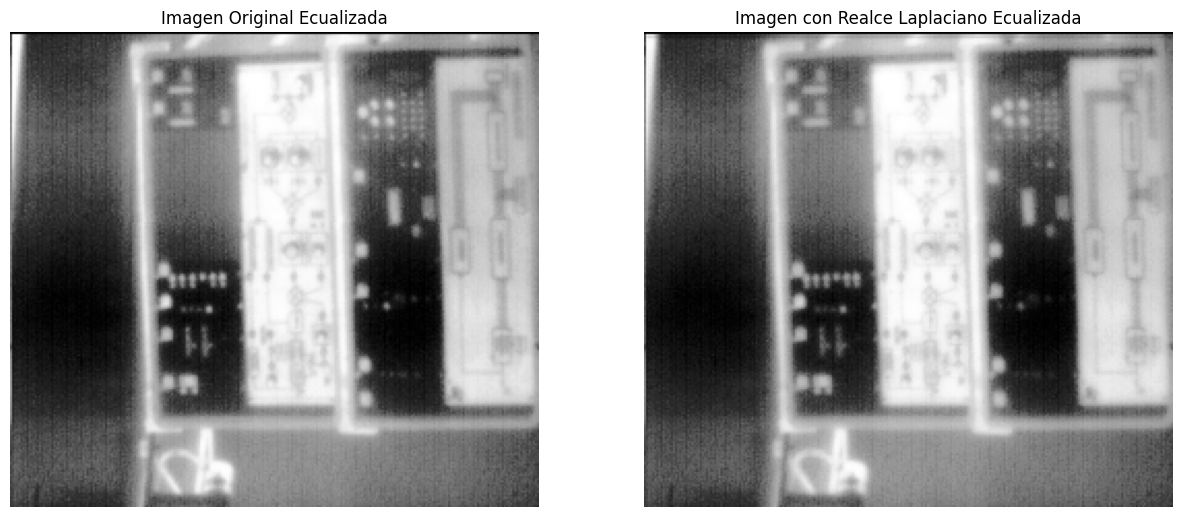

In [27]:
# 1. Invertir la imagen del LoG calibrada
log_inv = cv2.bitwise_not(film_gaussian_laplace_rescaled)

# 2. Combinar imágenes: 60% de la original + la invertida
film60 = film * 0.6
film_combined = film60 + log_inv * 0.4
film_combined = film_combined.astype(np.uint8)
film_uint8 = film.astype(np.uint8)

# 3. Ecualización de histograma para acentuar el interés
film_original_eq = cv2.equalizeHist(film_uint8)
film_combined_eq = cv2.equalizeHist(film_combined)

# 4. Visualización final
fig_final, ax_final = plt.subplots(1, 2, figsize=(15, 7))

ax_final[0].imshow(film_original_eq, cmap='gray')
ax_final[0].set_title('Imagen Original Ecualizada')
ax_final[0].axis('off')

ax_final[1].imshow(film_combined_eq, cmap='gray')
ax_final[1].set_title('Imagen con Realce Laplaciano Ecualizada')
ax_final[1].axis('off')

plt.show()

**Conclusión**

Al realizar la combinación de la imagen original (60%) con el LoG invertido (40%), el resultado visual post-ecualización es virtualmente idéntico a la imagen original ecualizada. Esto se debe a que el fondo blanco del LoG invertido actúa como un desplazamiento de brillo constante (DC offset) sobre la imagen. Al aplicar la ecualización de histograma posterior, el algoritmo redistribuye los tonos y cancela este desplazamiento, enmascarando el efecto global.

No obstante, el realce sí está presente a nivel de altas frecuencias: al sumar una máscara de bordes invertida, los contornos de los circuitos sufren un leve oscurecimiento, generando un sutil efecto de relieve que no afecta el contraste semántico global del objeto.

# **Ejercicio de síntesis**

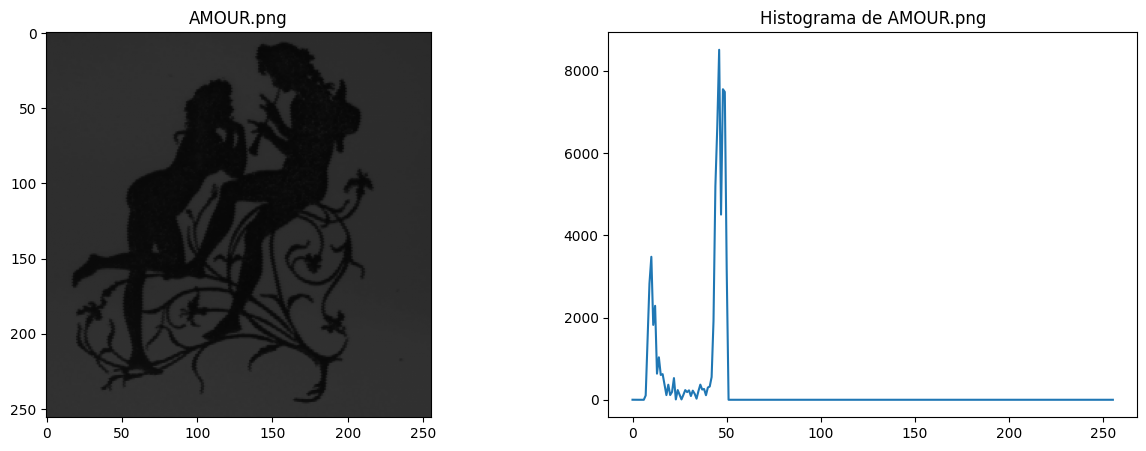

In [28]:
# Carga de AMOUR.png
amour = cv2.imread('images/AMOUR.png', cv2.IMREAD_GRAYSCALE)

# Histogram de AMOUR.png si lo llegamos a necesitar
hist_amour = cv2.calcHist([amour], [0], None, [256], [0, 256])

# Visualización de AMOUR y su respectivo hist
fig_amour, ax_amour = plt.subplots(1, 2, figsize=(15, 5))
ax_amour[0].imshow(amour, cmap='gray', vmin=0, vmax=255)
ax_amour[0].set_title('AMOUR.png')
ax_amour[1].plot(hist_amour)
ax_amour[1].set_title('Histograma de AMOUR.png')
plt.show()

In [30]:
# Intento con Log
amour_cany = canny(amour, sigma=2, low_threshold=0, high_threshold=7)
plt.imshow(amour_cany, cmap='gray')
plt.title('AMOUR con filtro Canny sigma = 2')
plt.show()

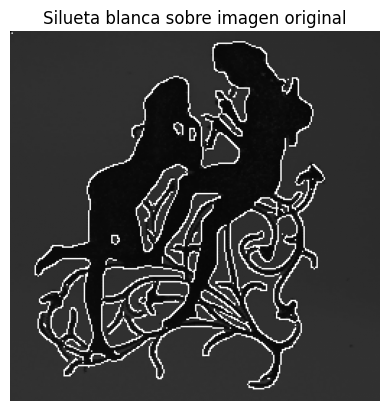

In [31]:
resultado = amour.copy()
#poner en blanco solo los bordes detectados por Canny
resultado[amour_cany] = 255

plt.imshow(resultado, cmap='gray', vmin=0, vmax=255)
plt.title("Silueta blanca sobre imagen original")
plt.axis('off')
plt.show()